## Import Library

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

## Load Price Data

In [28]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    raw_data = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    raw_data = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)
raw_data.tail(10)
ticker_data = raw_data[["Open", "Close", "Low", "High", "Volume"]]
ticker_data.columns = ["open", "close", "low", "high", "volume"]
ticker_data

,open,close,low,high,volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.1,942.9,943.6,1812
2018-08-13 09:05:00,943.1,943.3,942.9,943.5,1323
2018-08-13 09:10:00,943.2,943.1,942.6,943.3,1207
2018-08-13 09:15:00,943.1,942.6,942.3,943.1,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-06-26 14:15:00,1283.7,1281.3,1281.3,1285.6,9054
2024-06-26 14:20:00,1281.3,1286.8,1280.7,1286.8,11085
2024-06-26 14:25:00,1287.0,1289.5,1287.0,1290.4,13988


In [29]:
ticker_data.tail(51)

,open,close,low,high,volume
Date,,,,,
2024-06-26 09:00:00,1288.0,1289.4,1287.4,1289.9,6344
2024-06-26 09:05:00,1289.4,1288.9,1288.9,1290.1,2701
2024-06-26 09:10:00,1288.8,1289.1,1288.8,1289.8,1069
2024-06-26 09:15:00,1289.0,1290.6,1289.0,1291.0,4645
2024-06-26 09:20:00,1290.7,1289.9,1289.2,1290.8,2851
2024-06-26 09:25:00,1289.7,1289.8,1289.6,1290.2,2130
2024-06-26 09:30:00,1289.8,1289.7,1289.3,1290.1,2067
2024-06-26 09:35:00,1289.8,1290.6,1289.7,1290.8,3248
2024-06-26 09:40:00,1290.7,1291.5,1290.3,1291.5,3625


In [30]:
#@title Raw Price
def cal_open(tick):
  if not tick.empty:
    return tick[0]


def cal_high(tick):
  tick = tick[100*tick.index.hour+tick.index.minute > 930]
  tick = tick[100*tick.index.hour+tick.index.minute < 1401]
  return tick.max()


def cal_low(tick):
  tick = tick[100*tick.index.hour+tick.index.minute > 930]
  tick = tick[100*tick.index.hour+tick.index.minute < 1401]
  return tick.min()


def cal_price(tick):
  tick = tick[100*tick.index.hour+tick.index.minute == 1400]
  if not tick.empty:
    return tick[0]

price = ticker_data
price.volume = price.close
price = price.resample("D").agg({
    'volume': cal_open,
    'high':cal_high,
    'low': cal_low,
    'close': cal_price,
    'open': 'last',
    }).rename(columns={'volume': 'open', 'close': 'price', 'open': 'close'})
raw = price.dropna()
# open: close price of first bar 
# price: close price of 14:00:00 bar
# close: open price of 14:45:00 bar (it is same as close price, 14:45:00 only has 1 price)
# high: max price from 9:31:00 to 14:00:00
# low: min price from 9:31:00 to 14:00:00

In [31]:
price = raw.copy()
price.tail(10)

,open,high,low,price,close
Date,,,,,
2024-06-13,1331.0,1333.7,1324.9,1333.3,1335.0
2024-06-14,1332.1,1335.9,1327.5,1330.4,1317.0
2024-06-17,1313.9,1314.4,1306.4,1308.4,1308.0
2024-06-18,1311.9,1322.4,1311.4,1319.1,1308.5
2024-06-19,1310.9,1311.3,1298.8,1309.6,1317.0
2024-06-20,1317.5,1327.8,1316.7,1319.6,1323.7
2024-06-21,1321.2,1321.7,1313.0,1314.4,1320.9
2024-06-24,1314.9,1317.3,1290.4,1297.6,1290.7
2024-06-25,1292.5,1293.5,1285.8,1289.3,1287.7


In [32]:
price['percent'] = 100 * (price.price - price.close.shift(1)) / price.close.shift(1)
price['returns'] = (price.price - price.open) / (price.high - price.low)
price['return'] = 1000 * (price.close - price.price) / price.price
price.tail(10)

,open,high,low,price,close,percent,returns,return
Date,,,,,,,,
2024-06-13,1331.0,1333.7,1324.9,1333.3,1335.0,0.195386,0.261364,1.275032
2024-06-14,1332.1,1335.9,1327.5,1330.4,1317.0,-0.344569,-0.202381,-10.072159
2024-06-17,1313.9,1314.4,1306.4,1308.4,1308.0,-0.652999,-0.687500,-0.305717
2024-06-18,1311.9,1322.4,1311.4,1319.1,1308.5,0.848624,0.654545,-8.035782
2024-06-19,1310.9,1311.3,1298.8,1309.6,1317.0,0.084066,-0.104000,5.650580
2024-06-20,1317.5,1327.8,1316.7,1319.6,1323.7,0.197418,0.189189,3.107002
2024-06-21,1321.2,1321.7,1313.0,1314.4,1320.9,-0.702576,-0.781609,4.945222
2024-06-24,1314.9,1317.3,1290.4,1297.6,1290.7,-1.763949,-0.643123,-5.317509
2024-06-25,1292.5,1293.5,1285.8,1289.3,1287.7,-0.108468,-0.415584,-1.240983


In [33]:
price = price[price['return'] > -30]
price = price[price['return'] <  30]

In [34]:
price['percent_group'] = pd.qcut(price.percent, 30)
price['returns_group'] = pd.qcut(price.returns, 30)

## Analysis

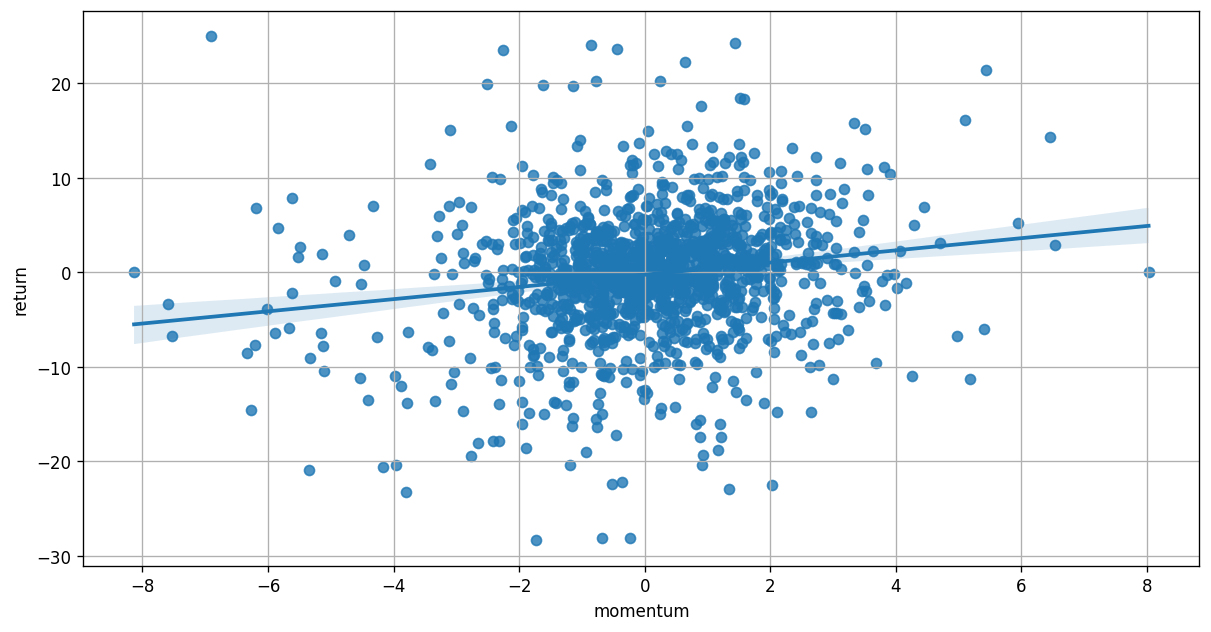

In [35]:
price['momentum'] = price.percent + price.returns
sns.regplot(x=price['momentum'], y=price['return'])
plt.grid(True)

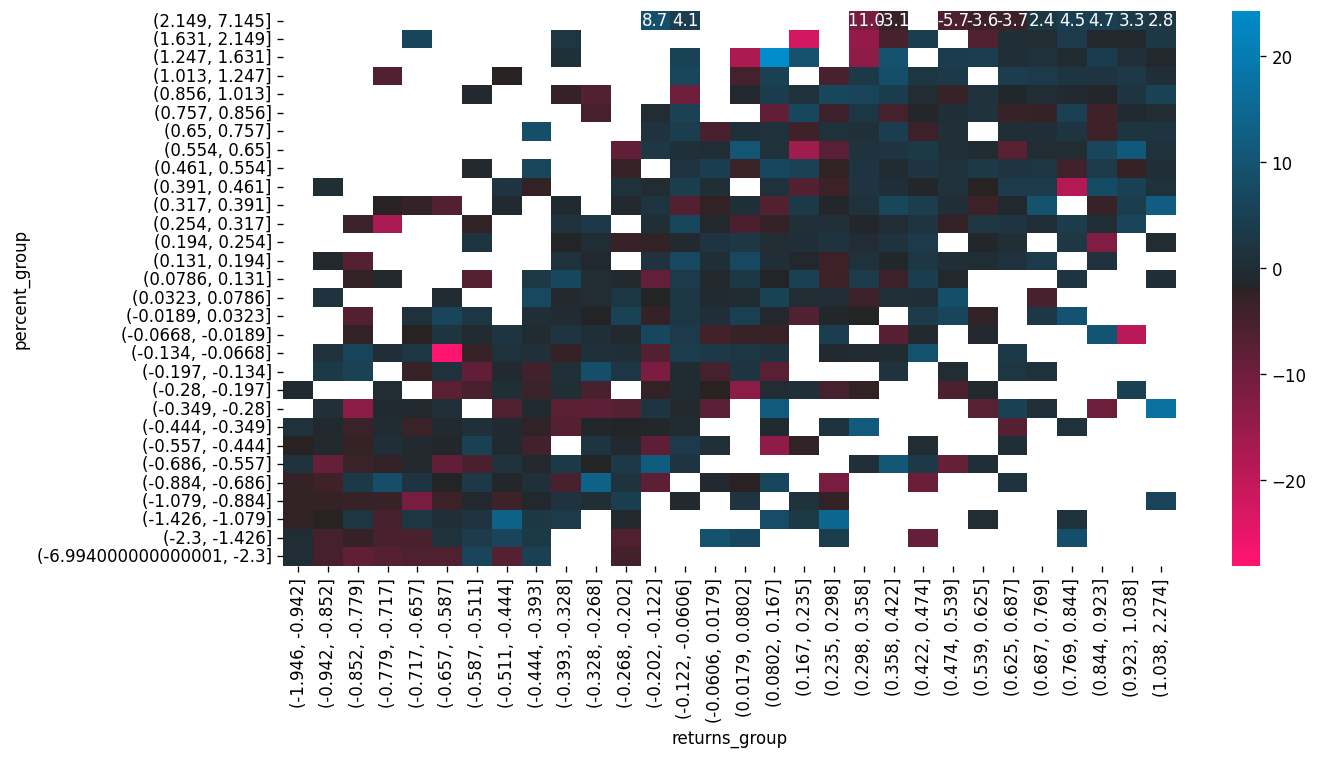

In [36]:
grpd = price.groupby(['percent_group', 'returns_group'])[['return']]
irs = grpd.mean().reset_index()
sns.heatmap(
    irs.pivot(index='percent_group', columns='returns_group', values='return').sort_index(ascending=False),
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f");

## Long

In [37]:
Long = price[price.percent > .26]
Long = Long[Long.returns > .39]
Long

,open,high,low,price,close,percent,returns,return,percent_group,returns_group,momentum
Date,,,,,,,,,,,
2018-08-14,954.9,961.0,952.1,960.8,959.3,0.702232,0.662921,-1.561199,"(0.65, 0.757]","(0.625, 0.687]",1.365154
2018-08-21,944.5,951.8,944.5,950.8,958.5,0.613757,0.863014,8.098443,"(0.554, 0.65]","(0.844, 0.923]",1.476770
2018-08-23,957.0,963.3,955.8,962.5,960.6,0.574713,0.733333,-1.974026,"(0.554, 0.65]","(0.687, 0.769]",1.308046
2018-08-27,961.5,965.2,961.6,963.3,963.2,0.500782,0.500000,-0.103810,"(0.461, 0.554]","(0.474, 0.539]",1.000782
2018-08-30,961.5,965.4,960.6,965.1,970.5,0.322245,0.750000,5.595275,"(0.317, 0.391]","(0.687, 0.769]",1.072245
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-15,1279.0,1293.4,1278.0,1290.9,1286.1,1.294727,0.772727,-3.718336,"(1.247, 1.631]","(0.769, 0.844]",2.067454
2024-05-16,1294.7,1310.8,1295.0,1305.9,1309.8,1.539538,0.708861,2.986446,"(1.247, 1.631]","(0.687, 0.769]",2.248399
2024-06-03,1281.4,1298.4,1281.4,1297.1,1291.5,2.133858,0.923529,-4.317323,"(1.631, 2.149]","(0.923, 1.038]",3.057388


In [38]:
Long['tail'] = (Long.high - Long.price) / (Long.high - Long.open)
Long['tail_group'] = pd.qcut(Long['tail'], 15, duplicates='drop')
Long[['return', 'tail_group']].groupby(['tail_group']).mean()
Long

,open,high,low,price,close,percent,returns,return,percent_group,returns_group,momentum,tail,tail_group
Date,,,,,,,,,,,,,
2018-08-14,954.9,961.0,952.1,960.8,959.3,0.702232,0.662921,-1.561199,"(0.65, 0.757]","(0.625, 0.687]",1.365154,0.032787,"(0.0159, 0.04]"
2018-08-21,944.5,951.8,944.5,950.8,958.5,0.613757,0.863014,8.098443,"(0.554, 0.65]","(0.844, 0.923]",1.476770,0.136986,"(0.132, 0.156]"
2018-08-23,957.0,963.3,955.8,962.5,960.6,0.574713,0.733333,-1.974026,"(0.554, 0.65]","(0.687, 0.769]",1.308046,0.126984,"(0.112, 0.132]"
2018-08-27,961.5,965.2,961.6,963.3,963.2,0.500782,0.500000,-0.103810,"(0.461, 0.554]","(0.474, 0.539]",1.000782,0.513514,"(0.503, 0.617]"
2018-08-30,961.5,965.4,960.6,965.1,970.5,0.322245,0.750000,5.595275,"(0.317, 0.391]","(0.687, 0.769]",1.072245,0.076923,"(0.0684, 0.0927]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-15,1279.0,1293.4,1278.0,1290.9,1286.1,1.294727,0.772727,-3.718336,"(1.247, 1.631]","(0.769, 0.844]",2.067454,0.173611,"(0.156, 0.184]"
2024-05-16,1294.7,1310.8,1295.0,1305.9,1309.8,1.539538,0.708861,2.986446,"(1.247, 1.631]","(0.687, 0.769]",2.248399,0.304348,"(0.25, 0.31]"
2024-06-03,1281.4,1298.4,1281.4,1297.1,1291.5,2.133858,0.923529,-4.317323,"(1.631, 2.149]","(0.923, 1.038]",3.057388,0.076471,"(0.0684, 0.0927]"


In [39]:
Long['return'].sum()

412.5597563557377

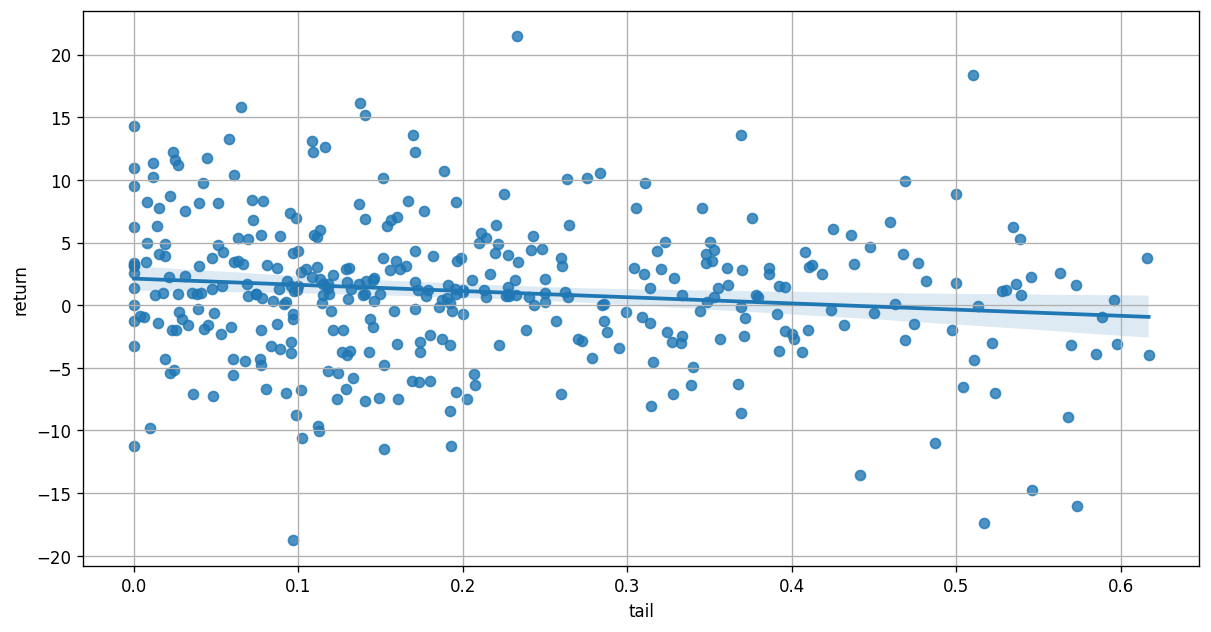

In [40]:
sns.regplot(x=Long['tail'], y=Long['return'])
plt.grid(True)

## Short

In [41]:
Short = price[price.percent < -.18]
Short = Short[Short.returns < -.39]

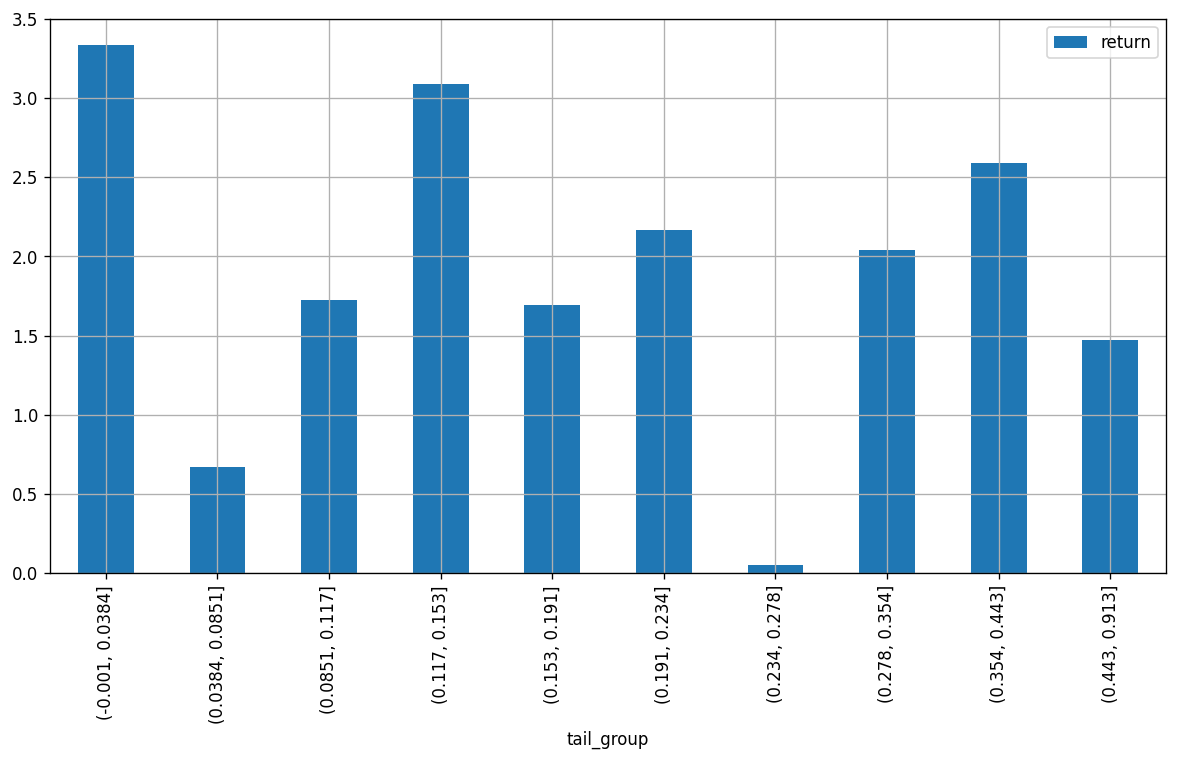

In [42]:
Short['tail'] = (Short.price - Short.low) / (Short.high - Short.low)
Short['tail_group'] = pd.qcut(Short['tail'], 10)
(-Short[['return', 'tail_group']].groupby(['tail_group']).mean()).plot.bar()
plt.grid(True)

In [43]:
Short

,open,high,low,price,close,percent,returns,return,percent_group,returns_group,momentum,tail,tail_group
Date,,,,,,,,,,,,,
2018-08-29,965.7,965.7,962.1,962.4,962.0,-0.331400,-0.916667,-0.415628,"(-0.349, -0.28]","(-0.942, -0.852]",-1.248067,0.083333,"(0.0384, 0.0851]"
2018-08-31,969.9,973.3,967.4,967.5,965.7,-0.309119,-0.406780,-1.860465,"(-0.349, -0.28]","(-0.444, -0.393]",-0.715899,0.016949,"(-0.001, 0.0384]"
2018-09-05,952.7,954.4,945.6,946.8,944.0,-0.962343,-0.670455,-2.957330,"(-1.079, -0.884]","(-0.717, -0.657]",-1.632798,0.136364,"(0.117, 0.153]"
2018-09-06,945.0,945.8,933.6,934.9,934.7,-0.963983,-0.827869,-0.213927,"(-1.079, -0.884]","(-0.852, -0.779]",-1.791852,0.106557,"(0.0851, 0.117]"
2018-09-10,943.5,944.8,935.2,935.5,936.2,-0.847907,-0.833333,0.748263,"(-0.884, -0.686]","(-0.852, -0.779]",-1.681240,0.031250,"(-0.001, 0.0384]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30,1267.9,1269.8,1256.5,1261.1,1270.0,-1.283757,-0.511278,7.057331,"(-1.426, -1.079]","(-0.511, -0.444]",-1.795036,0.345865,"(0.278, 0.354]"
2024-06-11,1314.5,1312.3,1300.3,1302.3,1305.0,-0.656038,-1.016667,2.073255,"(-0.686, -0.557]","(-1.946, -0.942]",-1.672705,0.166667,"(0.153, 0.191]"
2024-06-17,1313.9,1314.4,1306.4,1308.4,1308.0,-0.652999,-0.687500,-0.305717,"(-0.686, -0.557]","(-0.717, -0.657]",-1.340499,0.250000,"(0.234, 0.278]"


In [44]:
abs(Short['return'].sum())

656.0722219269384

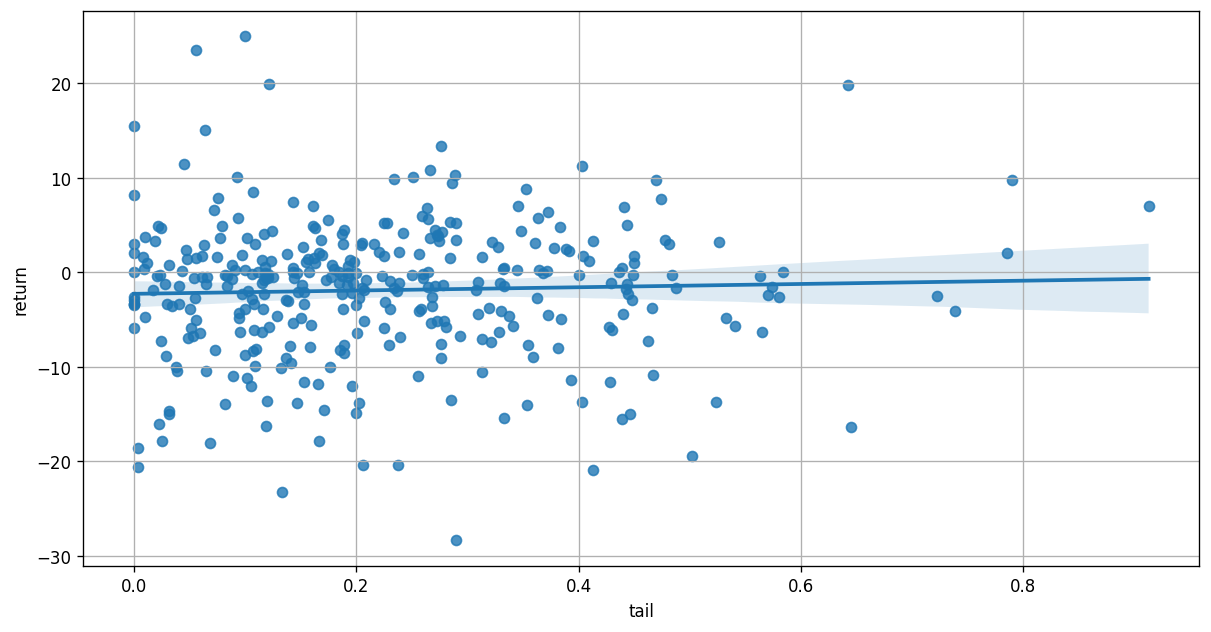

In [45]:
sns.regplot(x=Short['tail'], y=Short['return'])
plt.grid(True)